# Exploration of NBA Salaries
## Introduction

The focus of our exploratory data analysis (EDA) will be on the salaries of athletes in the National Basketball Association (NBA).
In exploring this data, we hope to examine how total salaries are divided amongst the teams and the allocation amongst
players within certain teams. The earnings of top athletes are frequently addressed in the media and our team would like
to explore the magnitude of the pay gap between top-performing teams and the best individual athletes relative to others.
Our team will provide an illustration of how these salaries have changed over the past 20 years.

## Guiding Questions

1. How are the salaries of NBA players divided amongst the teams in the league and amongst the players within these teams?

    In exploring this question, we would like to look at the allocation of the salaries in the league overall and examine some constituent
    teams, some containing star power and others which do not. In doing so, we would like to identify how the allocations
    differ when there are star players on a team.


2. Is there a significant correlation between the salaries paid and the success of a team?

    This question would assist in determining whether higher pay leads to better performance and if the ability for a
    team to succeed is dependent on the salaries paid.


3. How are player salaries related to the position played? How have these changed over time?

    Exploring these questions will identify if certain positions are more highly valued and provide insight into how
    team compositions may change over time.

## Dataset

ESPN publishes NBA player salaries from 1990 to 2021. This page is organized in a structured table with headings for
Rank, Name, Position, Team and Salary (USD). We will build and use a web scraper to pull this data into the same columns
and export it into a comma separated file (CSV). ESPN is part of The Walt Disney Company.

For the NBA team salaries, we will get the data from the website HoopsHype which is a website from USA Today Sports.
HoopsHype has team salary data 1990 to 2021 which is organized and displayed in a structured html table with columns:
Rank, Team, Salary (USD), and Salary adjusted for inflation (USD) using the U.S. Department of Labor Bureau of Labor Statistic.
Again, we will be scraping by building a web scraper and export each year into CSV files. We will be stitching the
multiple CSV files into a single one and wrangle the data usable for data analysis.

For any additional player and game information we will be using the website basketball-reference.com. The information
provided on this website is organized into structured tables which can be scraped if needed. Player data is separated
into Regular season and a Playoff table with 30 columns that include: Season, Age, Team (Tm), League (Lg), Position (Pos),
Games (G), Games Started (GS), Minutes played per game (MP), Field Goals per game (FG), Field Goal attempts per game (FGA),
Field Goal percentage (FG%), 3-Points Field Goals per game (3P), 3-Point Field Goal attempts per game (3PA),
3-Point Field Goal percentage (3P%), 2-Point Field Goals per game (2P), 2-Point Field Goal attempts per game (2PA),
2-Point Field Goal percentage (2P%), Effective Field Goal percentage (eFG%), Free Throws per game (FT),
Free Throw Attempts per game (FTA), Free Throw Percentage (FT%), Offensive Rebounds per game (ORB), Defensive Rounds per game (DRB),
Total Rounds per game (TRB), Assists per game (AST), Steals per game (STL), Blocks per game (BLK), Turnovers  per game (TOV),
Personal Fouls per game (PF), Points per game (PTS). These tables are available to download in a CSV format.
Basketball-reference is owned and operated by Sports Reference LLC.

Information on USA wages and salary growth will be retrieved from the website trading economics.com which uses
information from the U.S Bureau of Economic Analysis. There are multiple indicators listed from 1960-2021 including
age growth in percentage, Wages (USD/Hour) and Minimum Wages (USD/Hour) that we may use in our analysis.
This data set is available to be downloaded as a CSV file or we can use the python API that they have provided.

## Tasks

### Packages
Pandas, Matplotlib, NumPy, requests, lxml, seaborn

#### Web scraping
For our web scraping function, we used the package *requests* to make HTTP requests to retrieve data from a specific URL.
We will also need to make use of the *lxml* package, to handle XML and HTML tables. *Pandas* was used to convert the html
tables to a data frame which makes it easier for data wrangling.

#### Data Wrangling
Our data still needs to be cleaned and organized to be able to do more EDA on our data. For this, we will use *Pandas*
and *Numpy* packages. Tables retrieved from HoopsHype have extra characters in the table that need to be removed (\n\t,$).
We will also need to stitch together multiple CSV files to a master CSV file and organize the dataframe by teams.
For some of our visuals, we will need to filter our data based on players position which will completed
using *Pandas* package. *Numpy* will be used for any additional calculations that and *Pandas* will be used to add those
values to the dataframe.

#### Visualization
In order to create informative visuals, we will be applying different filters to our cleaned data. As our data consists
of both individual player and team information, we will need to appropriately select subjects of interest. Time series
data will likely be illustrated using a line graph but, we may consider other types if further insight may be gained.
To show the allocation of salaries among teams in the league, a pie chart would provide a clear visual of this distribution.
A bar of pie chart allows for more detailed inspection of specific teams from the overall set.

We may also do some basic calculations in order to develop some visual comparisons. In examining the salaries based on
position, we will calculate the mean/median for each player in the position during each season in order to develop a
broader understanding of how the position played impacts the salary received.

Following our exploration of the change in wages for both players in general as well as per position since 1991(?),
we will hone in our focus on the wage discrepancy within teams currently. Three different datasets will be evaluated,
each one representing a specific NBA team's salary sheet in the 2021-2022 season. Each team reflects a different
perspective and philosophy of wage distribution in the league, which includes a team with one superstar, a well-rounded
team with no dominant player and a team consisting of a mix of young players and role-players. We will calculate the
mean, median, standard deviation as well as the percent of the total salary each player takes up to illuminate the
distribution of wealth for each situation. Furthermore, a pie-chart will be utilized to visualize the data for each team,
and each of these charts will be put side by side for comparison.

# Datasets

## Webscraping function

This webscraping function used to grab team salary data from 1990 - 2021 from https://hoopshype.com/salaries/2019-2020/
The data presented on this website was from the HoopsHype's salary database and the adjusted for inflation data points
were provided by Current US Dollars adjusted for inflation from data provided by the U.S.
Department of Labor Bureau of Labor Statistic

The function is based of the code from Syed Sadat Nazrul written for a tutorial on Web Scraping with python
written on Jul 25,2018 https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

In [ ]:
import requests
import lxml.html as lh

def salary(url,year):
    url=url
    #Create a handle, page, to handle the contents of the website
    page = requests.get(url)

    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)

    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')

    col = []
    i=0

    for t in tr_elements[0]:
        i+=1
        name=t.text_content()
        print ('%d:"%s"'%(i,name))
        col.append((name,[]))
    for j in range(1,len(tr_elements)):
        T=tr_elements[j]
        if len(T)!=4:
            break
        i=0
        for t in T.iterchildren():
            data=t.text_content()
            #check if row is empty
            if i>0:
                try:
                    data=int(data)
                except:
                    pass
            col[i][1].append(data)
            i+=1

    [len(c) for (title,c) in col]

    dict = {title:column for (title,column)in col}
    df=pd.DataFrame(dict)

    team = df['Team'].str.strip('\n\t')
    rank = df[''].str.strip('\n\t.')
    salary = df.iloc[:,2].str.strip('\n\t$')
    salary2 = df.iloc[:,3].str.strip('\n\t$')
    year = [year]*27

    teamSalary = pd.DataFrame({
        "rank":rank[0:27],
        "team":team[0:27],
        "salary": salary[0:27],
        "salary(Inflation)":salary2[0:27],
        "Year":year
    })
    return teamSalary

#df = salary("https://hoopshype.com/salaries/2020-2021/",2021)
#df.to_csv(r'D:\UofC2021\DATA601\Project\Data601_Project\salary21.csv',index = False)

# Data wrangling
## Player data

For player data we will be using the csv file that was scraped from the ESPN website. First, we will check for any
missing data using a heatmap from the seaborn package. Missing values would have showed up as a yellow line.
The original data csv data set has 10476 rows and 6 columns. To answer our third guiding question,
How are player salaries related to the position played? How have these changed over time, we will only need to columns
"name", "position", "salary", and "season". From this subset, we can further subset our data into the different basketball
positions which are Center (C), Power Forward (PF), Small Forward (SF), Shooting Guard (SG), Point Guard (PG), Forward (F),
and Guard (G). There are 2 other positions that were omitted which were Shooting Guard and Small forward (GF) and NA.
There were only 57 of these players out of the 10476. We could have arbitrarily assigned the GF to either an SG or SF if
there were more of those designations in the dataset. The NA's span from the 2002 season to the 2013 and have players
that may have been demoted to the NBA-G which is their minor league or the NBA-D league for their development league during
the season. Other reasons for these NA designations could be retirement, injuries or signings to international teams.

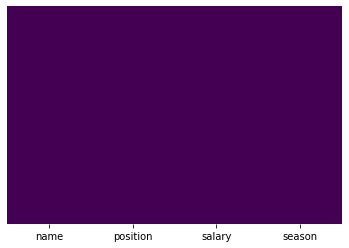

In [2]:
import pandas as pd
import seaborn as sns

# creates a subset of the data where x data to be used, and pos is the position
def makeSub(x,pos):
    return x[x["position"] == pos]


# groups the position data by years and calculates the mean salary
def meanCalc(x):
    return (x.set_index('season')
            .groupby(level=0).mean()
            .rename(columns={"salary":"mean salary"}))


# groups the position data by years and calculates the median salary
def addMed(x):
    return (x.set_index('season')
            .groupby(level=0).median())

# Original player data has 10476 rows and 6 columns
position = pd.read_csv('nba-salaries.csv',
                     usecols=['name','position','salary','season'])

# using a heat map to check for any missing values
sns.heatmap(position.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

# # subset of player data returning name, position, salary, and season
# position = player[['name','position','salary','season']]

#  separating the subset into the different basketball positions C, PF, SF, SG, PG, F, G
cPosition = makeSub(position," C") # 1996 rows
pfPosition = makeSub(position, " PF") # 1771 rows
sfPosition = makeSub(position, " SF") # 1558 rows
sgPosition = makeSub(position, " SG") # 1671 rows
pgPosition = makeSub(position, " PG") # 1542 rows
fPosition = makeSub(position, " F") # 871 rows
gPosition = makeSub(position, " G") # 1009 rows

# center subset
cMean = meanCalc(cPosition)
cMean['median salary']= addMed(cPosition)

# pf subset
pfMean = meanCalc(pfPosition)
pfMean['median salary']= addMed(pfPosition)

# sf subset
sfMean = meanCalc(sfPosition)
sfMean['median salary']= addMed(sfPosition)

# sg subset
sgMean = meanCalc(sgPosition)
sgMean['median salary']= addMed(sgPosition)

# pg subset
pgMean = meanCalc(pgPosition)
pgMean['median salary']= addMed(pgPosition)

# f subset
fMean = meanCalc(fPosition)
fMean['median salary']= addMed(fPosition)

# g subset
gMean = meanCalc(gPosition)
gMean['median salary']= addMed(gPosition)




## Team data
We have multiple files for team data from Hypehoops.com which we will need to join in a single CSV.
To do this more efficiently, we used the pack glob which finds all path names matching a specific pattern and returns
them to an empty list. The result of this is that we can write a for loop to loop through each of the CSV files by name
and run a pd.read_csv command instead of manually reading each of the files ourselves. To achieve this, we used the code
from Gaurave Singh, that was posted on stack overflow on January 20, 2014
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe


In [ ]:
import glob

path = r'D:\UofC2021\DATA601\Project\Data601_Project\teamSalary' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

teamData = pd.concat(li, axis=0, ignore_index=True)
#exporting to csv to be used for another classes
#teamData.to_csv(r'D:\UofC2021\DATA601\Project\Data601_Project\teamSalary.csv',index = False)


# removing commas from salary and salary(inflation), renamed, sorted
teamData = (teamData.replace(',',"",regex=True)
            .rename(columns={"salary(Inflation)":"salary adjusted"})
            .sort_values(by="Year"))

teamData.set_index(['Year','team'])

# win percentage from basketball reference.com
win2021 = pd.read_csv('winpercent2021.csv',
                      usecols=['Team','Conf','W','L','W/L%'])

# Team salary data for the 2021 season
team2021 = teamData[teamData["Year"]==2021]

team2021 = team2021.merge(win2021,how='left', left_on="team", right_on="Team")
team2021

# Analysis

## Visual 1

In order to understand the bigger picture, we believe it is helpful to examine the data for the NBA over time. The graphs below illustrate some of the general information in regards to team salaries across the league over the period 1991 to 2021. 

,rank,team,salary,salary(Inflation),Year
0,1,Portland,73898705,114626133,2000
1,2,New York,72288001,112127728,2000
2,3,LA Lakers,55018533,85340621,2000
3,4,Indiana,54988605,85294196,2000
4,5,Brooklyn,53245461,82590364,2000


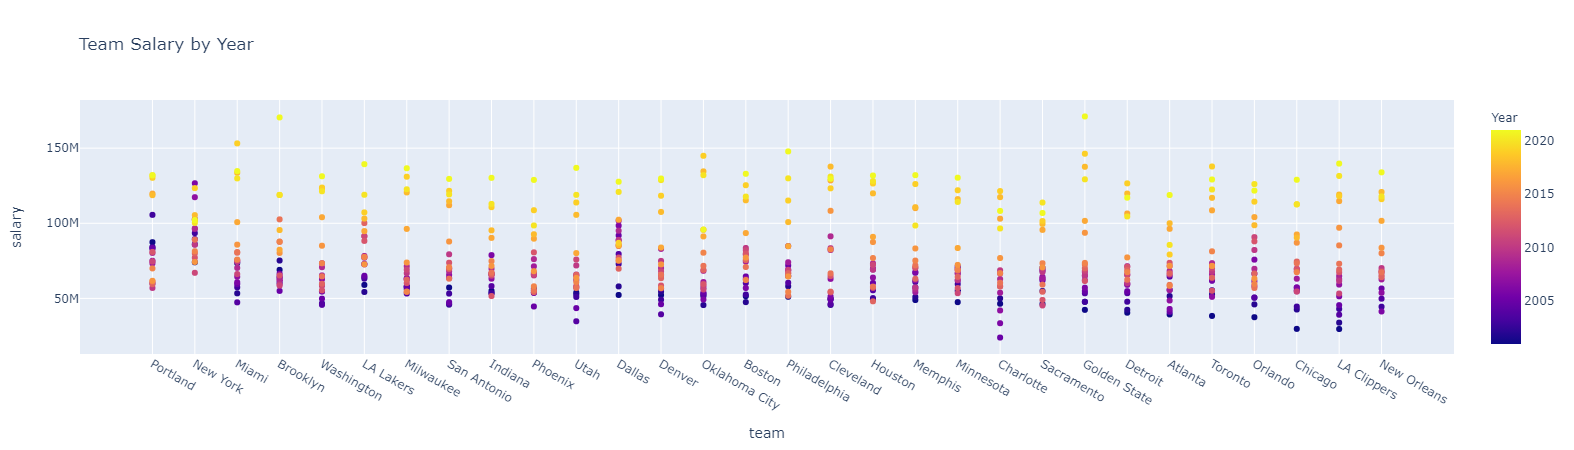

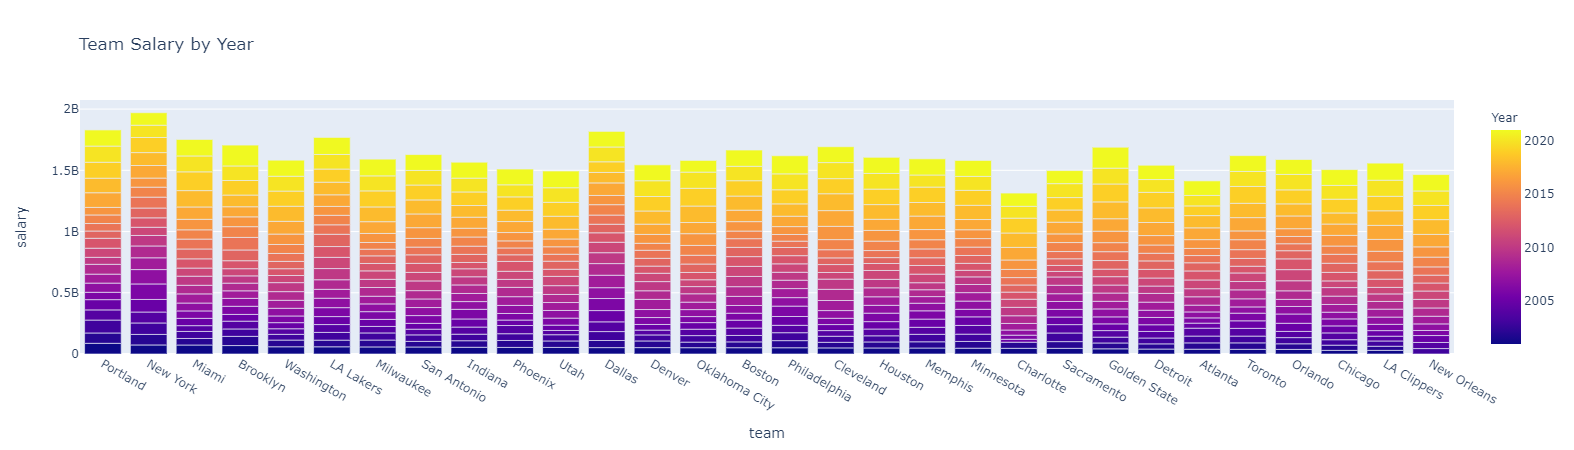

In [36]:
import plotly as plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

team_sal = pd.read_csv("teamSalary.csv")
#team_sal['salary']=team_sal['salary'].str.replace(',','')
team_sal.replace(',','',regex=True,inplace=True)
display(team_sal.head(5))

conference = {'Golden State' : 'Western Conference', 'Brooklyn' : 'Eastern Conference', 'Philadelphia' : 'Eastern Conference', 'LA Clippers' : 'Western Conference', 'LA Lakers' : 'Western Conference', 'Utah' :
              'Western Conference', 'Milwaukee' : 'Eastern Conference', 'Miami' : 'Eastern Conference', 'New Orleans' : 'Western Conference', 'Boston' : 'Eastern Conference', 'Memphis': 'Western Conference', 
              'Portland' : 'Western Conference', 'Houston' : 'Western Conference', 'Washington' : 'Eastern Conference', 'Minnesota' : 'Western Conference', 'Indiana' : 'Eastern Conference', 'Denver' : 
              'Western Conference', 'Cleveland' : 'Eastern Conference', 'San Antonio' : 'Western Conference', 'Toronto' : 'Eastern Conference', 'Chicago' : 'Eastern Conference', 'Phoenix':'Western Conference',
              'Dallas' : 'Western Conference', 'Orlando' : 'Eastern Conference', 'Atlanta' : 'Eastern Conference', 'Detroit' : 'Eastern Conference', 'Charlotte' : 'Eastern Conference', 'Sacramento' : 'Western Conference',
              'New York' : 'Eastern Conference', 'Oklahoma City' : 'Western Conference'}

team_sal['conference'] = team_sal['team'].map(conference)
team_sal = team_sal[team_sal['Year']>=2001]


fig = px.scatter(team_sal, x='team',y='salary',color='Year',title='Team Salary by Year')
fig.show()

fig2 = px.bar(team_sal, x='team', y='salary', color='Year',title='Team Salary by Year')
fig2.show()

#fig3 = px.scatter(team_sal, x='team',y='salary(Inflation)',color='Year',title='Team Salary (adjusted for inflation) by Year')
#fig3.show()

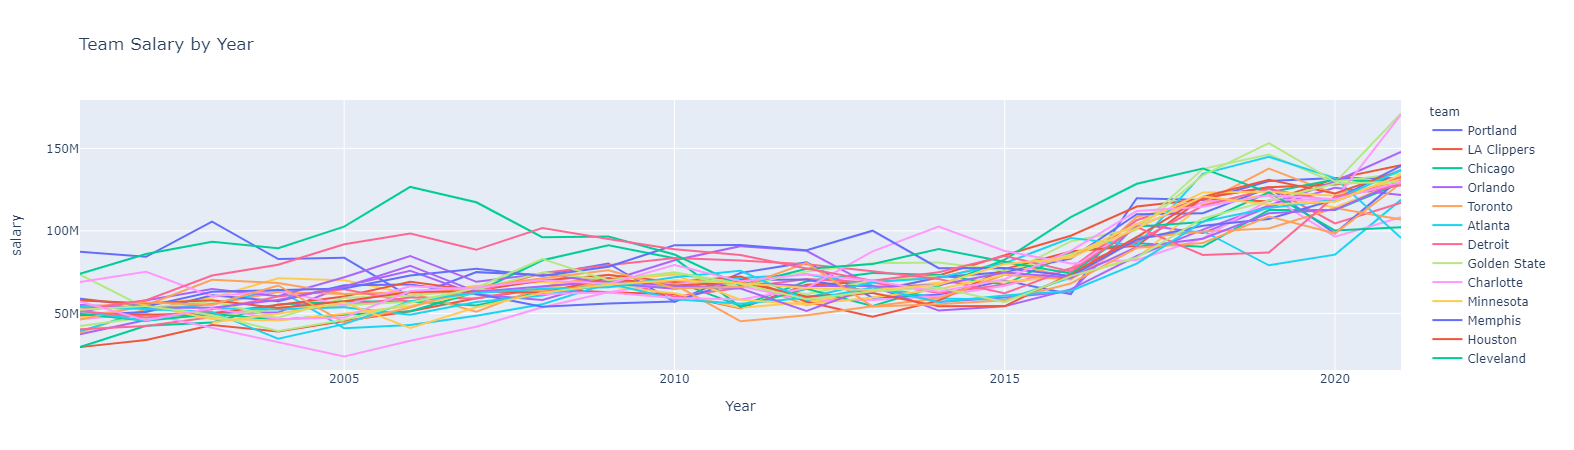

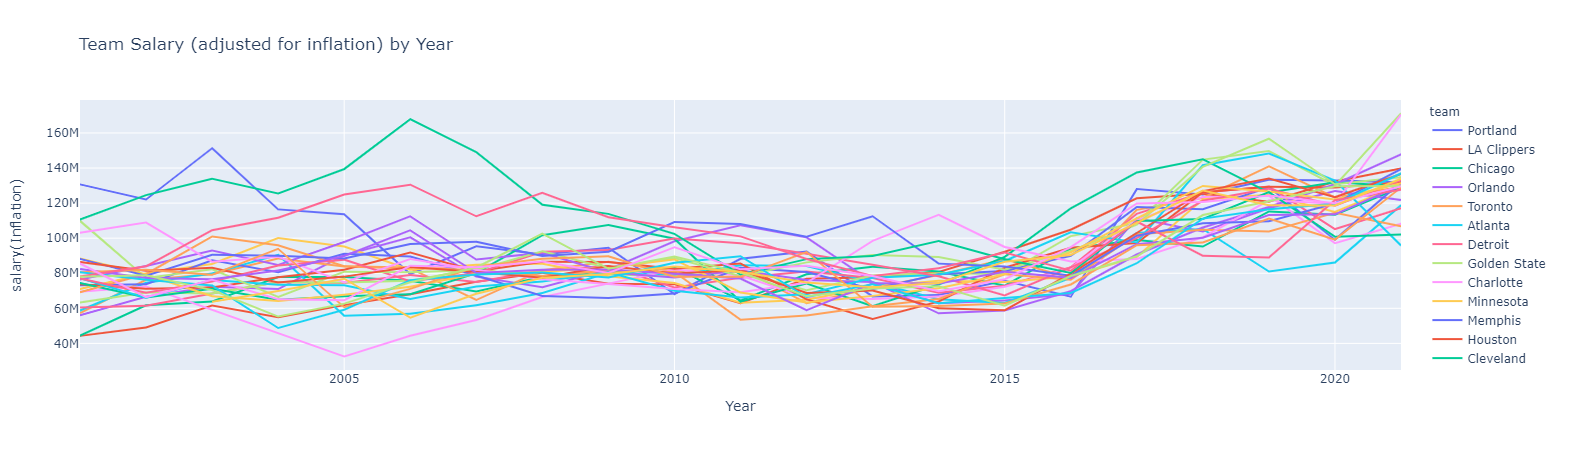

In [37]:
team_sal_yr_srt = team_sal.sort_values('Year',ascending=True)

fig4 = px.line(team_sal_yr_srt, x='Year',y='salary',color='team',title='Team Salary by Year')
fig4.show()

fig5 = px.line(team_sal_yr_srt, x='Year',y='salary(Inflation)',color='team',title='Team Salary (adjusted for inflation) by Year')
fig5.show()

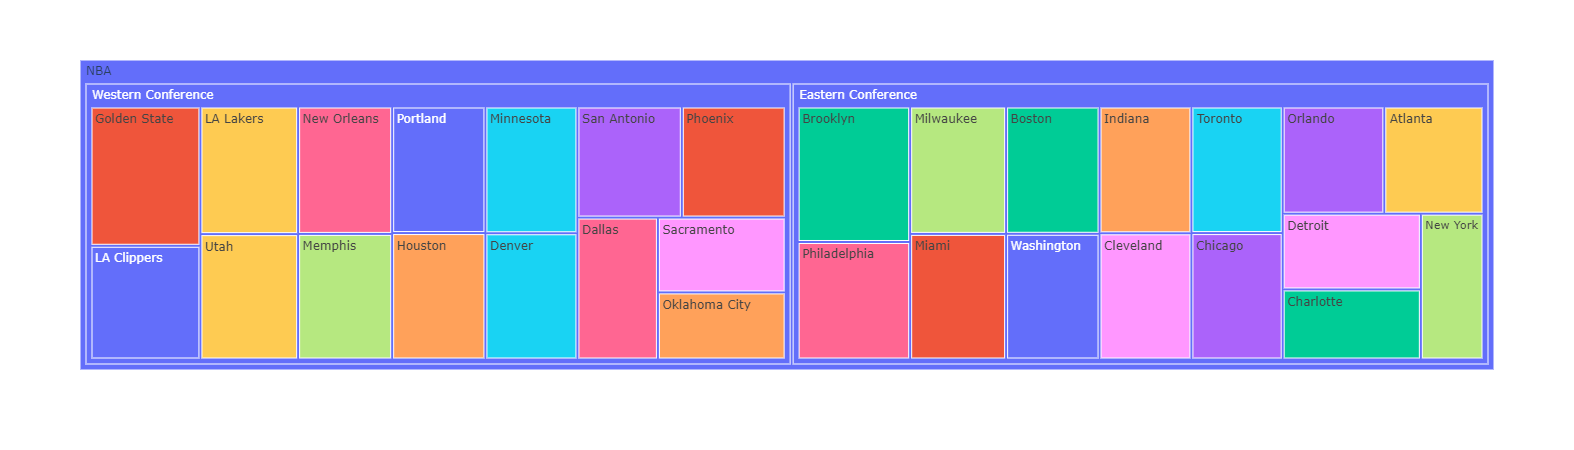

In [44]:
team_sal_2021 = team_sal[team_sal['Year'] == 2021]

fig6 = px.treemap(team_sal_2021, path=[px.Constant("NBA"), 'conference', 'team'], values='salary',color='team')
fig6.show()